# 모듈 및 데이터 로딩

In [1]:
from typing import Any

import matplotlib.pyplot as plt
# %pip install -r ../requirements.txt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

In [2]:
data: DataFrame | Any = pd.read_csv('yelp.csv', index_col=0)

# 데이터 탐색 & Data Cleaning & Feature Engineering

In [3]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [5]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [6]:
# 불필요한 컬럼 제거
data.drop(['review_id', 'user_id', 'business_id', 'date'], axis=1, inplace=True)

In [7]:
# 텍스트 길이 컬럼으로 추가
data['text_length'] = data['text'].apply(len)

In [8]:
# 별점 분포 확인
data['stars'].value_counts()

stars
5    7532
1    2468
Name: count, dtype: int64

<Axes: xlabel='stars', ylabel='count'>

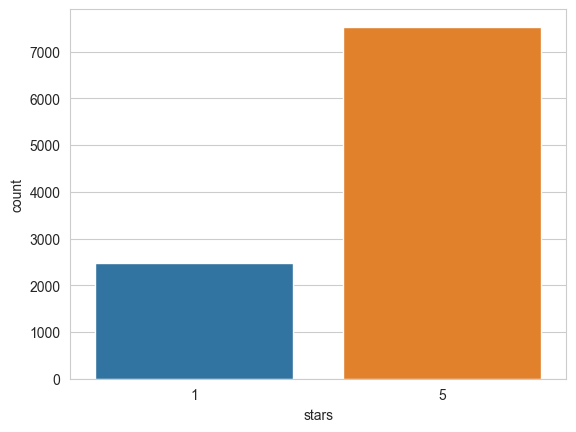

In [9]:
sns.countplot(x='stars', data=data)

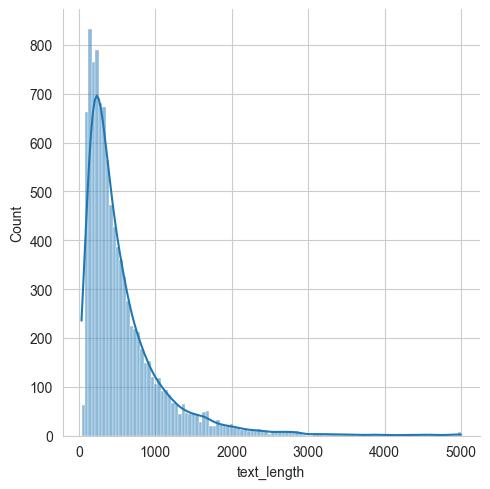

In [10]:
# 텍스트 길이 분포 확인
sns.displot(data['text_length'], kde=True)

In [11]:
# 변수별 상관관계 확인
data.drop("text", axis=1).corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


<Axes: >

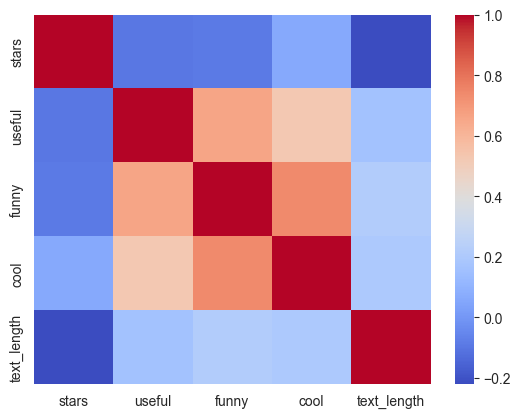

In [12]:
sns.heatmap(data.drop("text", axis=1).corr(), cmap='coolwarm')

# 불필요한 기호 제거

In [13]:
import string

In [14]:
# 펑션으로 만들어보기
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s

In [15]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [16]:
# List Comprehension으로 만들어보기
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [17]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455


# 상투적인 단어 제거하기

In [18]:
from nltk.corpus import stopwords

In [19]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hkit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# 펑션으로 만들어보기
def stop_w(x):
    new_s = []
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [21]:
# data['text'].apply(stop_w)

In [22]:
# List Comprehension으로 만들어보기
data['text'] = data['text'].apply(
    lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

In [23]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


# 단어 등장 빈도 확인하기

In [24]:
data["text"].head()

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
Name: text, dtype: object

In [25]:
data.iloc[0]["text"]

['love',
 'cheeses',
 'worth',
 'price',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic',
 'nice',
 'sample',
 'days',
 'yum',
 'top',
 'quality',
 'meats',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies',
 'veggie',
 'chips',
 'mega',
 'tasty',
 'always',
 'quick',
 'friendly',
 'check',
 'produce',
 'stellar',
 'also',
 'finding',
 'better',
 'madison']

In [26]:
# 모든 단어를 하나의 리스트로 통합하기
word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)


In [27]:
word_split

['love',
 'cheeses',
 'worth',
 'price',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic',
 'nice',
 'sample',
 'days',
 'yum',
 'top',
 'quality',
 'meats',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies',
 'veggie',
 'chips',
 'mega',
 'tasty',
 'always',
 'quick',
 'friendly',
 'check',
 'produce',
 'stellar',
 'also',
 'finding',
 'better',
 'madison',
 'become',
 'goto',
 'sushi',
 'place',
 'sushi',
 'always',
 'fresh',
 'delicious',
 'get',
 '30',
 'sushi',
 'platter',
 'perfect',
 'two',
 'people',
 'service',
 'always',
 'fast',
 'servers',
 'pleasant',
 'give',
 'salads',
 'potatoes',
 'wait',
 'food',
 'nice',
 'touch',
 'meal',
 'bring',
 'little',
 'bottles',
 'korean',
 'yoghurt',
 'also',
 'delicious',
 'disappointed',
 'hotel',
 'restaurants',
 'good',
 'booked',
 'eiffel',
 'tower',
 'view',
 'got',
 'room',
 'view',
 'paid',
 'extra',
 'view',
 'put',
 'room',
 'view',
 '18th',
 'floor',
 'excited',
 'pool',
 'plays',
 'loud',
 'music',

In [28]:
len(word_split)

542773

In [29]:
from nltk.probability import FreqDist

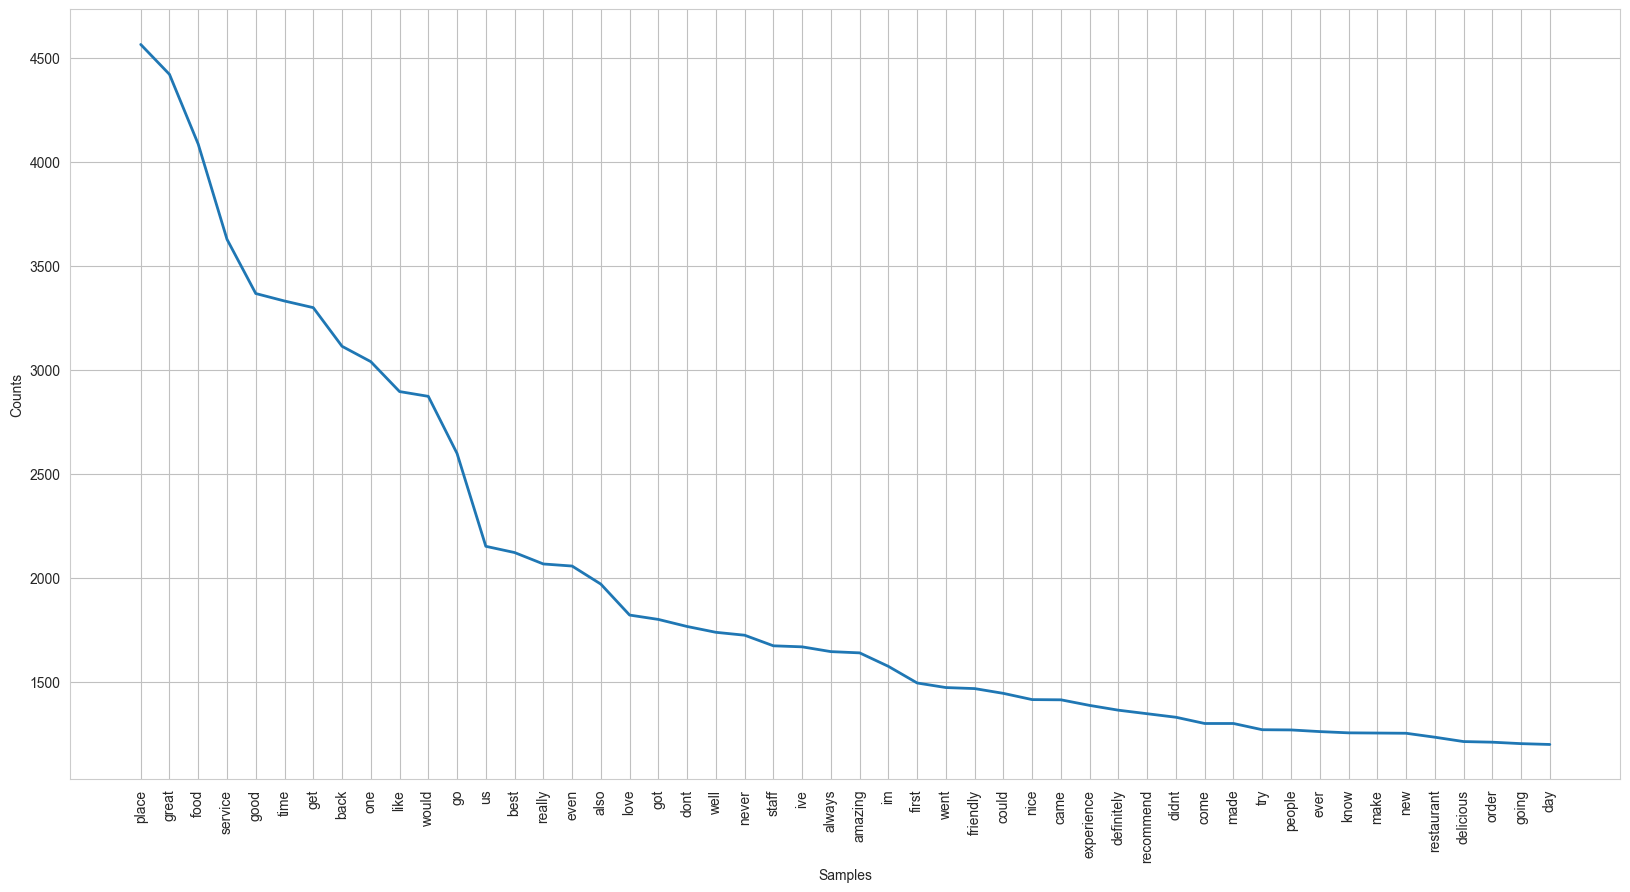

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50)

# Word Cloud 만들기

In [31]:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# !python -m pip install ../wordcloud-1.8.1-cp311-cp311-win_amd64.whl
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

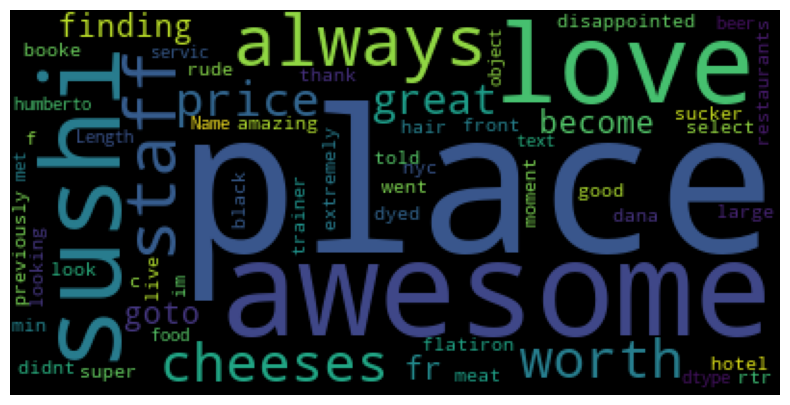

In [32]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

In [33]:
data['stars'].value_counts()

stars
5    7532
1    2468
Name: count, dtype: int64

# 1점과 5점 Text에 대해 각각 Word Cloud 만들기

In [34]:
good = data[data['stars'] == 5]['text']
bad = data[data['stars'] == 1]['text']

(-0.5, 399.5, 199.5, -0.5)

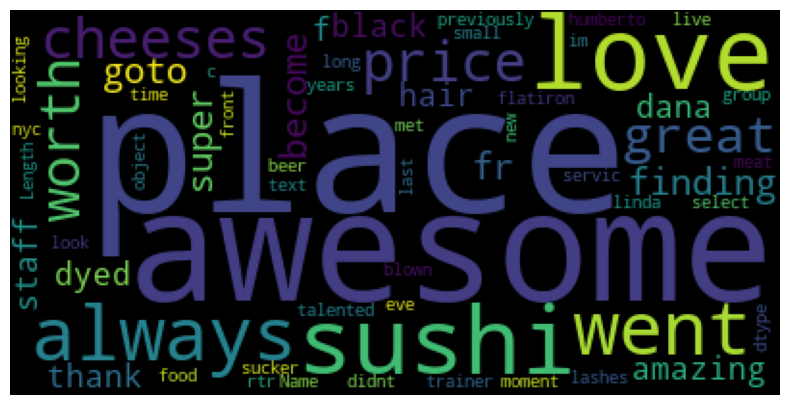

In [35]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

542773

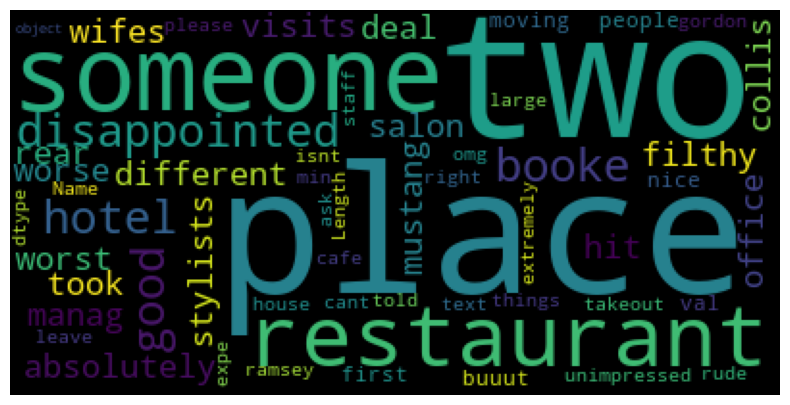

In [36]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')#%%
len(word_split)